In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_excel(r'C:\Users\aditi\OneDrive\Documents\Data_Train.xlsx')

In [3]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data=train_data.copy()

In [11]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_datatime(col):
    data[col]=pd.to_datetime(data[col])

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_datatime(feature)

In [16]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [18]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [19]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [20]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [21]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-30 05:50:00,2022-09-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-09-30 18:05:00,2022-09-30 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-09-30 16:50:00,2022-09-30 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [23]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [24]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-30 05:50:00,2022-09-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-30 18:05:00,2022-09-30 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-30 16:50:00,2022-09-30 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-09-30 19:55:00,2022-09-30 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-09-30 20:45:00,2022-09-30 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-09-30 08:20:00,2022-09-30 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-09-30 11:30:00,2022-09-30 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [25]:
def extract_hour_minute(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [26]:
extract_hour_minute(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [27]:
extract_hour_minute(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [28]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'early morning'
    elif (x>8) and (x<=12):
        return 'morning'
    elif (x>12) and (x<=16):
        return 'noon'
    elif (x>16) and (x<=20):
        return 'evening'
    elif (x>20) and (x<=24):
        return 'night'
    else:
        return 'late night'

In [29]:
flight_dep_time(20)

'evening'

<AxesSubplot:>

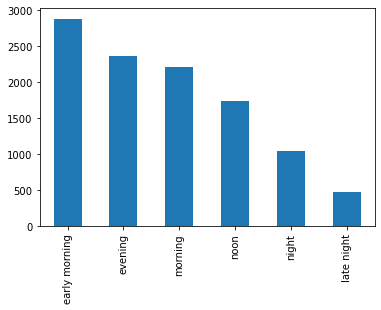

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind=' bar')

In [31]:
flight_dep_time(20)

'evening'

In [33]:
!pip install plotly

In [38]:
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [39]:
cf.go_offline()

In [40]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [41]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [46]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+ x
    elif 'm' not in x:
        x=x+ ' 0m'
    return x

In [73]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [57]:
data['Duration'][0].split(' ')[0]

'2h'

In [59]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [71]:
int(data['Duration'][4355].split(' ')[1][0:-1])

35

In [76]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [75]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [77]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,0,19


In [79]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [80]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,25,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,0,19,1140


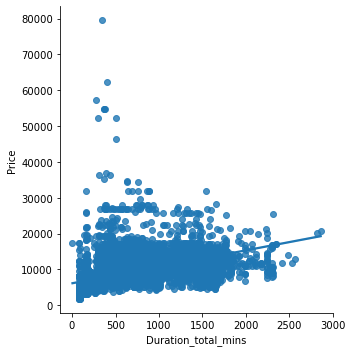

In [81]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [82]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h 0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h 0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h 0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h 0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h 0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '18h 45m',
       '12h 20m', '18h 0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h 0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h 0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m',

In [83]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

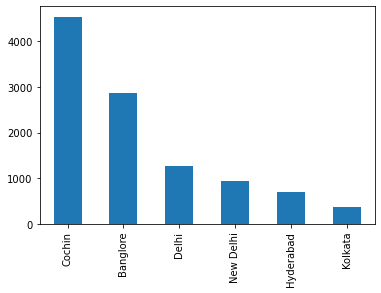

In [85]:
data['Destination'].value_counts().plot(kind='bar')

In [87]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [93]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

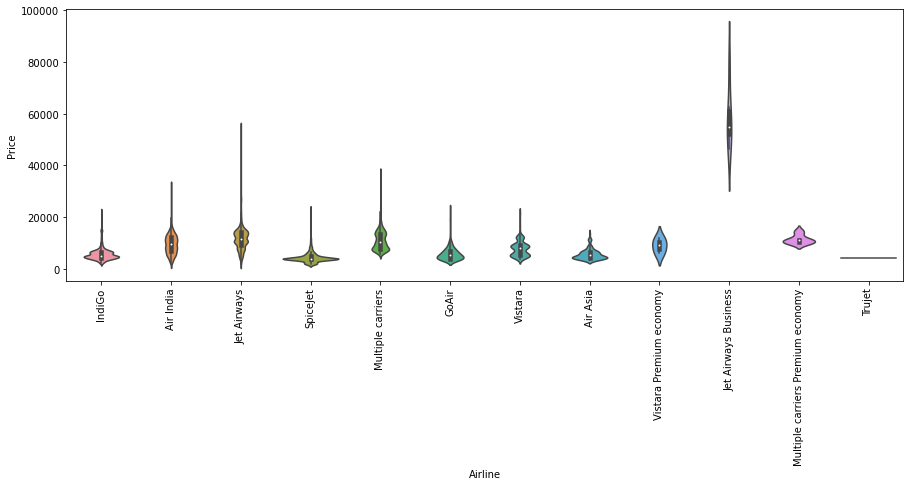

In [97]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [98]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,25,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,0,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,25,5,325


In [101]:
data['Additional_Info'].value_counts()/len(data)*100,2

(No info                         78.112713
 In-flight meal not included     18.554578
 No check-in baggage included     2.995694
 1 Long layover                   0.177869
 Change airports                  0.065531
 Business class                   0.037446
 No Info                          0.028085
 1 Short layover                  0.009362
 Red-eye flight                   0.009362
 2 Long layover                   0.009362
 Name: Additional_Info, dtype: float64,
 2)

In [119]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [120]:
num_col=[col for col in data.columns if data[col].dtype=='object']

In [121]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [123]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [135]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [141]:
##we are using one hot encoding technique
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x:1 if x==category else 0)
    

In [142]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,50,2,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,25,7,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,0,19,0,0,1,0,0


In [148]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [149]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [151]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [152]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [155]:
data['Airline']=data['Airline'].map(dict1)

In [156]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [157]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,50,2,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,25,7,0,1,0,0,0


In [158]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [159]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [160]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [162]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [163]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [165]:
dict2={key:index for index,key in enumerate(dest,0)}

In [166]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [167]:
data['Destination']=data['Destination'].map(dict2)

In [168]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [169]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,50,2,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,25,7,0,1,0,0,0


In [174]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [175]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [176]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [177]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [178]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



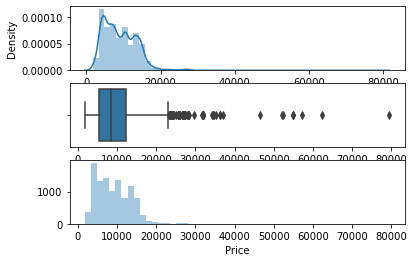

In [179]:
plot(data,'Price')

In [182]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [183]:
data['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



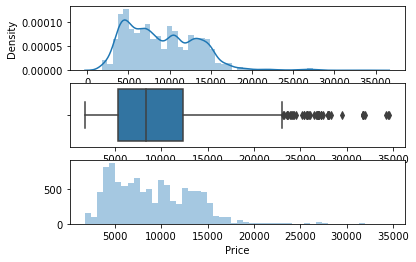

In [184]:
plot(data,'Price')

In [185]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,50,2,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,25,7,0,1,0,0,0


In [186]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [187]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,25,7,0,1,0,0,0


In [188]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_mins            int64
Duration_hours           int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [189]:
from sklearn.feature_selection import mutual_info_regression

In [191]:
X=data.drop(['Price'],axis=1)

In [202]:
X.columns

Index(['Airline', 'Destination', 'Total_Stops', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_mins', 'Duration_hours',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [192]:
y=data['Price']

In [193]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_mins          int64
Duration_hours         int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [194]:
mutual_info_regression(X,y)

array([0.97662486, 1.00169325, 0.78957425, 0.19798231, 0.24565253,
       0.33864209, 0.26133589, 0.39624958, 0.34641712, 0.3481805 ,
       0.46489985, 0.39812424, 0.46165656, 0.51865798, 0.13114092,
       0.20465721])

In [195]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)

In [203]:
imp.columns=['Importance']

In [206]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,0.999623
Airline,0.971853
Total_Stops,0.793479
Source_Delhi,0.518622
Duration_hours,0.470423
Source_Kolkata,0.456967
Arrival_Time_hour,0.401980
Source_Banglore,0.387738
Arrival_Time_minute,0.347754
Duration_mins,0.342199


In [207]:
##To build the machine learning model
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()

In [208]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
ml_model=RandomForestRegressor()

In [211]:
model=ml_model.fit( X_train,y_train)

In [212]:
y_pred=model.predict(X_test)
y_pred

array([16769.09,  6514.68,  8855.45, ...,  3508.28,  6280.32,  7052.1 ])

In [213]:
y_pred.shape

(2671,)

In [215]:
import pickle

In [217]:
file=open(r'C:\Users\aditi\OneDrive\Desktop\research_project/rf_random.pkl','wb')

In [218]:
pickle.dump(model,file)

In [219]:
model=open(r'C:\Users\aditi\OneDrive\Desktop\research_project/rf_random.pkl','rb')

In [220]:
forest=pickle.load(model)
forest.predict(X_test)

array([16769.09,  6514.68,  8855.45, ...,  3508.28,  6280.32,  7052.1 ])

In [223]:

def mape(y_true,y_pred):
    np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
    

In [224]:
mape(y_test,forest.predict(X_test))

13.180094677512313

In [234]:
##to find out how well the model is performing. 
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training_score:{}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print("the predictions are: {}".format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE: ',metrics.mean_squared_error(y_test,y_prediction))
    print('MAE: ',metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MSE: ',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score:0.9514220058808721
the predictions are: [16763.63  6471.14  8736.87 ...  3514.44  6570.11  7090.89]


r2_score: 0.8083767297810175
MSE:  3730445.111203694
MAE:  1178.9786018012003
RMSE:  1931.4360230677312
MSE:  13.193273119538343


C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



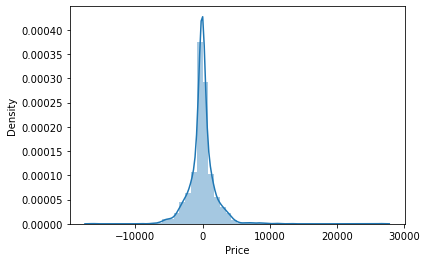

In [236]:
predict(RandomForestRegressor())

In [237]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf=RandomForestRegressor()


In [238]:
np.linspace(start=1000,stop=1300,num=7)

array([1000., 1050., 1100., 1150., 1200., 1250., 1300.])

In [240]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf=RandomForestRegressor()
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1300,num=7)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[10,5,8,100]
random_grid= {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}
rf_random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [10, 5, 8, 100],
                                        'n_estimators': [1000, 1050, 1100, 1150,
                                                         1200, 1250, 1300]})

In [241]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 13}

In [243]:
pred2=rf_random.predict(X_test)
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8288210218685655

In [ ]:
##We achieved a higher accuracy of 82.88 after doing cross validation